In [226]:
# Import packages
import tweepy
import json
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

from config import consumer_key, consumer_secret, access_token, access_token_secret
from datetime import datetime
from pprint import pprint
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy Authentication 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [227]:
#Data for New York Times
ny = "@nytimes"

ny_list = []
counter = 1
oldest_tweet = None

for x in range(1, 6):
    public_tweets = api.user_timeline(ny, max_id=oldest_tweet)

    for tweets in public_tweets:
        # Converting time to integer
        raw_time = tweets["created_at"]
        convert = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")

        news_text = tweets["text"]
        news_source = tweets["user"]["name"]
        news_time = convert

        results = analyzer.polarity_scores(tweets["text"])
        compound= results["compound"]
        pos= results["pos"]
        neg= results["neg"]
        neu= results["neu"]

        oldest_tweet = tweets['id'] - 1
        
        #Storing into the empty lists
        ny_list.append({
            "Source": news_source,
            "Tweet Time": news_time,
            "Compound": compound,
            "Tweet": news_text,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Tweets Ago": counter

    })

        counter +=1
ny_data = pd.DataFrame(ny_list)
ny_data = ny_data.sort_values("Tweets Ago", ascending=False)
ny_data.head()

,Compound,Negative,Neutral,Positive,Source,Tweet,Tweet Time,Tweets Ago
99,-0.4767,0.119,0.881,0.000,The New York Times,RT @PatrickKingsley: This Greek refugee camp i...,2018-10-03 07:52:44+00:00,100
98,0.8591,0.000,0.642,0.358,The New York Times,Chinese state TV has a new tool that it hopes ...,2018-10-03 08:00:10+00:00,99
97,0.5927,0.000,0.839,0.161,The New York Times,Marks &amp; Spencer is a cultural fixture in t...,2018-10-03 08:15:03+00:00,98
96,0.2960,0.000,0.891,0.109,The New York Times,"In this Egyptian-Australian family, dogs were ...",2018-10-03 08:30:12+00:00,97
95,-0.8481,0.313,0.687,0.000,The New York Times,Poisonous batches of bootleg alcohol killed at...,2018-10-03 08:45:03+00:00,96


In [228]:
#Data for New York Times
cbs = "@CBS"

cbs_list = []
counter = 1
oldest_tweet = None

for x in range(1, 6):
    public_tweets = api.user_timeline(cbs, max_id=oldest_tweet)

    for tweets in public_tweets:
        # Converting time to integer
        raw_time = tweets["created_at"]
        convert = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")

        news_text = tweets["text"]
        news_source = tweets["user"]["name"]
        news_time = convert

        results = analyzer.polarity_scores(tweets["text"])
        compound= results["compound"]
        pos= results["pos"]
        neg= results["neg"]
        neu= results["neu"]

        oldest_tweet = tweets['id'] - 1
        
        #Storing into the empty lists
        cbs_list.append({
            "Source": news_source,
            "Tweet Time": news_time,
            "Compound": compound,
            "Tweet": news_text,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Tweets Ago": counter

    })

        counter +=1
cbs_data = pd.DataFrame(cbs_list)
cbs_data = cbs_data.sort_values("Tweets Ago", ascending=False)
cbs_data.head()

,Compound,Negative,Neutral,Positive,Source,Tweet,Tweet Time,Tweets Ago
99,0.5994,0.0,0.843,0.157,CBS,"RT @MagnumPICBS: ""This has been my white whale...",2018-08-05 23:35:49+00:00,100
98,0.0000,0.0,1.000,0.000,CBS,"RT @MagnumPICBS: ""What we are trying to do is ...",2018-08-05 23:41:21+00:00,99
97,0.8316,0.0,0.694,0.306,CBS,"RT @MagnumPICBS: ""There are a lot of easter eg...",2018-08-05 23:44:39+00:00,98
96,0.0000,0.0,1.000,0.000,CBS,"RT @MagnumPICBS: ""If there was ever a time to ...",2018-08-05 23:58:41+00:00,97
95,0.5093,0.0,0.859,0.141,CBS,That's all for our #CBS #TCA18 panels! Tune in...,2018-08-06 00:02:02+00:00,96


In [229]:
#Data for New York Times
bbc = "@BBC"

bbc_list = []
counter = 1
oldest_tweet = None

for x in range(1):
    public_tweets = api.user_timeline(bbc, max_id=oldest_tweet)

    for tweets in public_tweets:
        # Converting time to integer
        raw_time = tweets["created_at"]
        convert = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")

        news_text = tweets["text"]
        news_source = tweets["user"]["name"]
        news_time = convert

        results = analyzer.polarity_scores(tweets["text"])
        compound= results["compound"]
        pos= results["pos"]
        neg= results["neg"]
        neu= results["neu"]

        oldest_tweet = tweets['id'] - 1
        
        #Storing into the empty lists
        bbc_list.append({
            "Source": news_source,
            "Tweet Time": news_time,
            "Compound": compound,
            "Tweet": news_text,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Tweets Ago": counter

    })

        counter +=1
bbc_data = pd.DataFrame(bbc_list)
bbc_data = bbc_data.sort_values("Tweets Ago", ascending=False)
bbc_data.head()

,Compound,Negative,Neutral,Positive,Source,Tweet,Tweet Time,Tweets Ago
19,0.5719,0.000,0.829,0.171,BBC,Donna Strickland has become the first woman to...,2018-10-02 10:47:27+00:00,20
18,0.0000,0.000,1.000,0.000,BBC,Jodie Whittaker. New Doctor...and a 'Shat Lass...,2018-10-02 12:05:04+00:00,19
17,0.5994,0.000,0.795,0.205,BBC,"🍲😋 A bowl of warm, hearty stew is always a wel...",2018-10-02 13:05:03+00:00,18
16,-0.2732,0.242,0.554,0.204,BBC,Two scientists who discovered how to fight can...,2018-10-02 14:06:04+00:00,17
15,0.7096,0.000,0.766,0.234,BBC,"In 2002, Iberian Lynx were the rarest cats in ...",2018-10-02 16:06:02+00:00,16


In [230]:
#Data for New York Times
cnn = "@CNN"

cnn_list = []
counter = 1
oldest_tweet = None

for x in range(1, 6):
    public_tweets = api.user_timeline(cnn, max_id=oldest_tweet)

    for tweets in public_tweets:
        # Converting time to integer
        raw_time = tweets["created_at"]
        convert = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")

        news_text = tweets["text"]
        news_source = tweets["user"]["name"]
        news_time = convert

        results = analyzer.polarity_scores(tweets["text"])
        compound= results["compound"]
        pos= results["pos"]
        neg= results["neg"]
        neu= results["neu"]

        oldest_tweet = tweets['id'] - 1
        
        #Storing into the empty lists
        cnn_list.append({
            "Source": news_source,
            "Tweet Time": news_time,
            "Compound": compound,
            "Tweet": news_text,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Tweets Ago": counter

    })

        counter +=1
cnn_data = pd.DataFrame(cnn_list)
cnn_data = cnn_data.sort_values("Tweets Ago", ascending=False)
cnn_data.head()

,Compound,Negative,Neutral,Positive,Source,Tweet,Tweet Time,Tweets Ago
99,0.0000,0.000,1.000,0.0,CNN,Take a rare tour underneath and inside San Fra...,2018-10-03 20:16:00+00:00,100
98,0.0000,0.000,1.000,0.0,CNN,Typhoon Kong-rey will be the ninth tropical sy...,2018-10-03 20:21:06+00:00,99
97,-0.5994,0.197,0.803,0.0,CNN,"RT @TheLeadCNN: ""There appears to be no bottom...",2018-10-03 20:25:39+00:00,98
96,-0.3400,0.124,0.876,0.0,CNN,The Senate passed legislation intended to comb...,2018-10-03 20:29:56+00:00,97
95,0.0000,0.000,1.000,0.0,CNN,White House press secretary Sarah Sanders says...,2018-10-03 20:31:00+00:00,96


In [231]:
#Data for New York Times
fox = "@FOXTV"

fox_list = []
counter = 1
oldest_tweet = None

for x in range(1, 6):
    public_tweets = api.user_timeline(fox, max_id=oldest_tweet)

    for tweets in public_tweets:
        # Converting time to integer
        raw_time = tweets["created_at"]
        convert = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")

        news_text = tweets["text"]
        news_source = tweets["user"]["name"]
        news_time = convert


#             if (tweets["user"]["followers_count"] < max_followers
#                 and tweets["user"]["statuses_count"] > min_tweets
#                 and tweets["user"]["statuses_count"] < max_tweets
#                 and tweets["user"]["friends_count"] < max_following
#                 and tweets["user"]["lang"] == lang):

        results = analyzer.polarity_scores(tweets["text"])
        compound= results["compound"]
        pos= results["pos"]
        neg= results["neg"]
        neu= results["neu"]

        oldest_tweet = tweets['id'] - 1
        
        #Storing into the empty lists
        fox_list.append({
            "Source": news_source,
            "Tweet Time": news_time,
            "Compound": compound,
            "Tweet": news_text,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Tweets Ago": counter

    })

        counter +=1
fox_data = pd.DataFrame(fox_list)
fox_data = fox_data.sort_values("Tweets Ago", ascending=False)
fox_data.head()

,Compound,Negative,Neutral,Positive,Source,Tweet,Tweet Time,Tweets Ago
99,0.0,0.0,1.0,0.0,FOX,@danielreseller @gofooji @911onFOX @ResidentFO...,2018-10-01 19:29:04+00:00,100
98,0.0,0.0,1.0,0.0,FOX,@lauralbarlow @lauralbarlow We're all out of #...,2018-10-01 19:29:08+00:00,99
97,0.0,0.0,1.0,0.0,FOX,@yarriixa @yarriixa We're all out of #PrepareW...,2018-10-01 19:29:16+00:00,98
96,0.0,0.0,1.0,0.0,FOX,@Cah103079 @gofooji @911onFOX @ResidentFOX @Ca...,2018-10-01 19:29:22+00:00,97
95,0.0,0.0,1.0,0.0,FOX,@FigQue @gofooji @911onFOX @ResidentFOX @FigQu...,2018-10-01 19:29:59+00:00,96


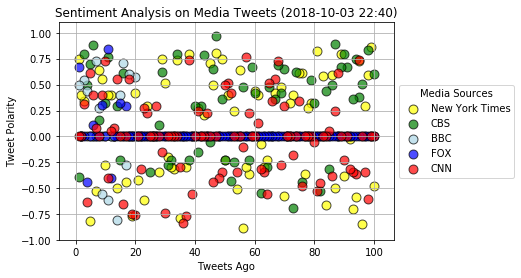

In [232]:
ny_plot= ny_data.plot(kind="scatter", x="Tweets Ago", y="Compound", color="yellow", s=80, label="New York Times", edgecolor="black", alpha=0.7)
cbs_data.plot(kind="scatter", x="Tweets Ago", y="Compound", ax=ny_plot, color="green", s=80, label="CBS", edgecolor="black", alpha=0.7)
bbc_data.plot(kind="scatter", x="Tweets Ago", y="Compound", ax=ny_plot, color="lightblue", s=80, label="BBC", edgecolor="black", alpha=0.7)
fox_data.plot(kind="scatter", x="Tweets Ago", y="Compound", ax=ny_plot, color="blue", s=80, label="FOX", edgecolor="black", alpha=0.7)
cnn_data.plot(kind="scatter", x="Tweets Ago", y="Compound", ax=ny_plot, color="red", s=80, label="CNN", edgecolor="black", alpha=0.7)

# Cleaning the data
plt.grid()
plt.legend(title="Media Sources", loc='center left', bbox_to_anchor=(1.0, 0.5))
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis on Media Tweets ({now})")
plt.ylabel("Tweet Polarity")
plt.savefig("Homework Images/sentiment_analysis.png")
plt.show()

In [233]:
average_bbc = bbc_data["Compound"].mean()
average_cbs = cbs_data["Compound"].mean()
average_cnn = cnn_data["Compound"].mean()
average_ny = ny_data["Compound"].mean()
average_fox = fox_data["Compound"].mean()

average_data = {"BBC": average_bbc,
                "CBS": average_cbs,
                "CNN": average_cnn,
                "NYT": average_ny,
                "Fox": average_fox}

df = pd.DataFrame({"Sources":["BBC","CBS","CNN","NYT","Fox"],
                   "Tweet Polarity":[average_bbc, average_cbs ,average_cnn ,average_ny, average_fox]})
df

,Sources,Tweet Polarity
0,BBC,0.125815
1,CBS,0.171097
2,CNN,-0.014569
3,NYT,0.064915
4,Fox,0.017009


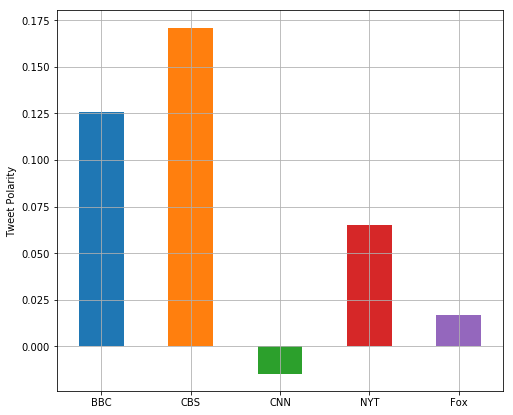

In [234]:
df.plot(kind="bar", x="Sources", y="Tweet Polarity", rot=0, figsize=(8,7), legend=False)
plt.xlabel("")
plt.ylabel("Tweet Polarity")
plt.grid()
plt.savefig("Homework Images/averages.png")
plt.show()